**Загружаем библиотеки**

In [33]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from annoy import AnnoyIndex
from transformers import AutoTokenizer, AutoModel
from tensorflow import convert_to_tensor
import tensorflow as tf

**Загружаем модели**

- модель для векторизации текста
- индекс векторов изображений для поиска
- модель преобразования вектора текста в векто изображения

In [34]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
bert = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

In [39]:
u = AnnoyIndex(1000, 'euclidean')
u.load('train.ann')

True

In [40]:
model = tf.keras.models.load_model('model.keras')

Функция предобработки текста

In [37]:
def text_processing(texts):
    result = []
    for text in tqdm(texts):
        tokenized = tokenizer(text, return_tensors="pt")
        embeddings = bert(**tokenized, output_hidden_states=True).pooler_output
        result.append(embeddings.detach().numpy()[0])
    embeddings = convert_to_tensor(result, dtype='float32')
    embeddings = tf.linalg.normalize(embeddings, axis=1)[0]
    return embeddings

**Демонстрационная функция**

Передаем список описаний, получаем картинки

In [41]:
def demonstrate(texts, u=u, n=5, mode='train'):
    vectors = text_processing(texts)
    vv = tf.linalg.normalize(model(vectors), axis=1)[0]
    
    for t, v in zip(texts, vv):
        print(t)
        pics = u.get_nns_by_vector(v, n=n, search_k=-1, include_distances=False)
        
        f, axarr = plt.subplots(1, n, figsize=(20, 5))
        for j in range(n):
            axarr[j].imshow(mpimg.imread(f'./{mode}_dataset_{mode}/{mode}/{pics[j]}.png'))
        plt.show()

Запускаем

100%|██████████| 6/6 [00:00<00:00,  9.52it/s]


Изразец гладкий расписной "пермский"- карниз А/РУС-143 ПОКМ-18870/50 [эмаль (белая, зеленая)],глина (красная),эмалирование,формовка,роспись     Карниз с выпукло-вогнутой лицевой поверхностью и росписью в виде рамки зеленой эмали на белом фоне по краям лицевой пластины (ПГУ 1706/246, Р-2, уч. Г/13, гл.  0,8-1,5 м)


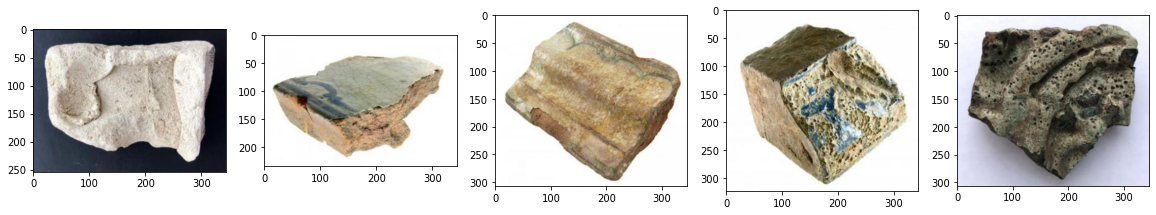

Стул резной Д/М-18 ПОКМ-11572/91 окраска, токарное точение, столярная работа, краска, дерево высота 93 см, ширина сиденья 43 см, глубина сиденья 41 см 1880-е    Жесткий, окрашен темно-коричневой краской. На четырех ножках. Передние ножки круглые в сечении, точеные (с «яблоками», перехватами и гладкими сужающимися книзу столбиками). Задние ножки прямоугольные в сечении, немного изогнутые. Сиденье подтрапециевидное, фигурной формы. Царга повторяет форму сиденья (также под сиденьем недалеко от задней царги закреплен еще один брусок, болтами прикрученный к царге). Спинка немного отклоняется назад. Ее боковые устои являются продолжением задних ножек. Устои соединены двумя дугообразными планками (верхняя - резная). Верхняя и нижняя планки были соединены по центру резной сплатой. Над верхней планкой - точеные навершия боковых устоев («шишечки»).


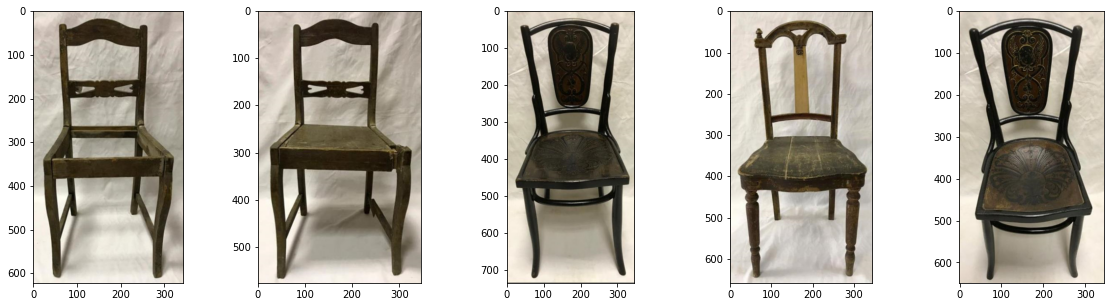

Ядро, пушечное. ОР-182 ПОКМ-4735 долбление (?),песчаник     Ядро каменное, яйцеобразной формы. Покрыто тонкой спекшейся корочкой светло-коричневого цвета. Сбоку круглое неглубокое отверстие.


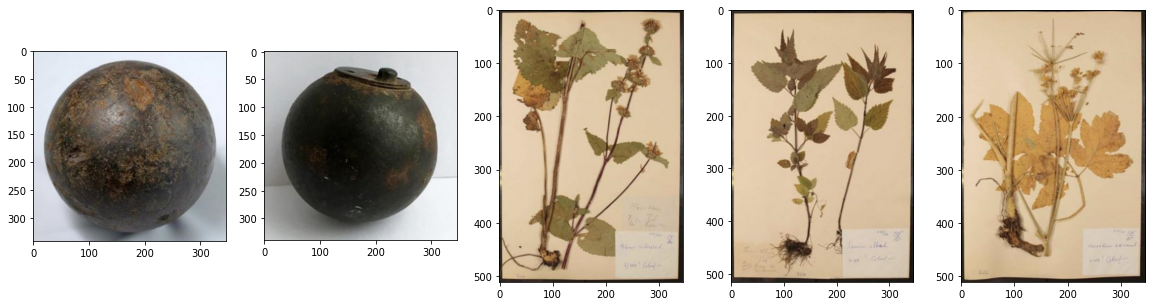

Гербарий. Ежеголовник малый. Sparganium minimum Wallr.  ПОКМ-7190/1 расправлено,гербарий,высушено,смонтировано на лист а3 формата    Теплоухов Федор Александрович Цветущее растение


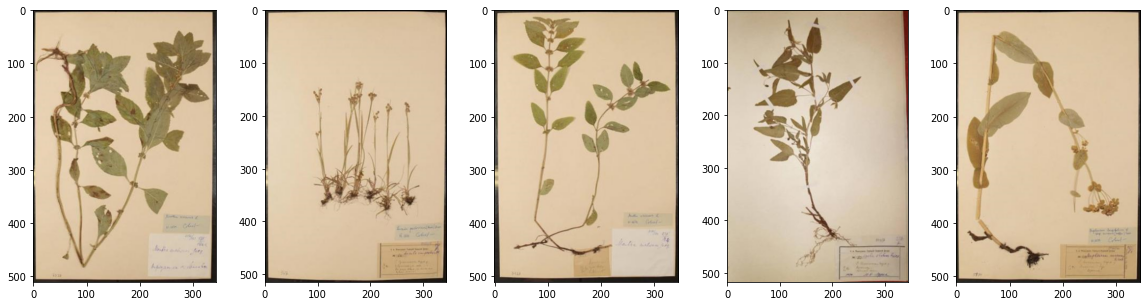

Монета 1 копейка 1800 г. А/РУС-297 ПКМ-21218/8 медь; штамповка Д- 28,5 мм. 1800 г.  правление Павла 1  АВЕРС: В центре поля - вензель императора Павла I, составленный из литеры "П" ("Павел") и цифры "I" ("Первый"). Над вензелем - императорская корона. РЕВЕРС: Вверху номинал в две строчки: "1. / КОПЕЙКА". Под обрезом дата эмиссии "1800" и литеры "Е.М." ("екатеринбургская монета") - обозначение Екатеринбургского монетного двора. ГУРТ: шнуровидный. (Р-4. Уч. Д΄, гл.  2,0 м


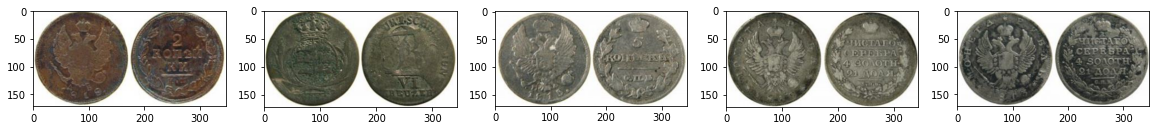

Картина. "В лесах Рифея".  ПОКМ-19723/1 холст,масло    Новиньков Юрий Алексеевич Пейзаж в приглушенно-зеленых, голубых, сиреневых и охристых тонах - вид с высокой точки на высокие ели и поднимающийся меж их стволов сиреневатый дым от кострища, возле которого видны два идола. Сквозь ели видна голубая полоска леса на горизонте, серо-голубое небо.


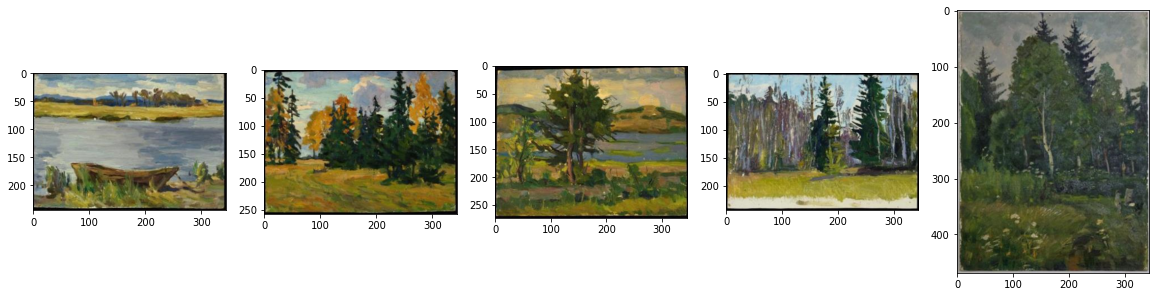

In [53]:
demonstrate([
    'Изразец гладкий расписной "пермский"- карниз А/РУС-143 ПОКМ-18870/50 [эмаль (белая, зеленая)],глина (красная),эмалирование,формовка,роспись     Карниз с выпукло-вогнутой лицевой поверхностью и росписью в виде рамки зеленой эмали на белом фоне по краям лицевой пластины (ПГУ 1706/246, Р-2, уч. Г/13, гл.  0,8-1,5 м)',
    'Стул резной Д/М-18 ПОКМ-11572/91 окраска, токарное точение, столярная работа, краска, дерево высота 93 см, ширина сиденья 43 см, глубина сиденья 41 см 1880-е    Жесткий, окрашен темно-коричневой краской. На четырех ножках. Передние ножки круглые в сечении, точеные (с «яблоками», перехватами и гладкими сужающимися книзу столбиками). Задние ножки прямоугольные в сечении, немного изогнутые. Сиденье подтрапециевидное, фигурной формы. Царга повторяет форму сиденья (также под сиденьем недалеко от задней царги закреплен еще один брусок, болтами прикрученный к царге). Спинка немного отклоняется назад. Ее боковые устои являются продолжением задних ножек. Устои соединены двумя дугообразными планками (верхняя - резная). Верхняя и нижняя планки были соединены по центру резной сплатой. Над верхней планкой - точеные навершия боковых устоев («шишечки»).',
    'Ядро, пушечное. ОР-182 ПОКМ-4735 долбление (?),песчаник     Ядро каменное, яйцеобразной формы. Покрыто тонкой спекшейся корочкой светло-коричневого цвета. Сбоку круглое неглубокое отверстие.',
    'Гербарий. Ежеголовник малый. Sparganium minimum Wallr.  ПОКМ-7190/1 расправлено,гербарий,высушено,смонтировано на лист а3 формата    Теплоухов Федор Александрович Цветущее растение',
    'Монета 1 копейка 1800 г. А/РУС-297 ПКМ-21218/8 медь; штамповка Д- 28,5 мм. 1800 г.  правление Павла 1  АВЕРС: В центре поля - вензель императора Павла I, составленный из литеры "П" ("Павел") и цифры "I" ("Первый"). Над вензелем - императорская корона. РЕВЕРС: Вверху номинал в две строчки: "1. / КОПЕЙКА". Под обрезом дата эмиссии "1800" и литеры "Е.М." ("екатеринбургская монета") - обозначение Екатеринбургского монетного двора. ГУРТ: шнуровидный. (Р-4. Уч. Д΄\22, гл.  2,0 м',
    'Картина. "В лесах Рифея".  ПОКМ-19723/1 холст,масло    Новиньков Юрий Алексеевич Пейзаж в приглушенно-зеленых, голубых, сиреневых и охристых тонах - вид с высокой точки на высокие ели и поднимающийся меж их стволов сиреневатый дым от кострища, возле которого видны два идола. Сквозь ели видна голубая полоска леса на горизонте, серо-голубое небо.'
])
